In [184]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas_ml import ConfusionMatrix
np.random.seed(1324)
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [185]:
train_df = pd.read_excel("dataset.xlsx")
train_df.head()

,Age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [186]:
train_df.head()

,Age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [187]:
def catg(x):
    if x == 0:
        return x
    if x ==1:
        return x
    if x ==2:
        return 1
    if x==3:
        return 1
    if x==4:
        return 1

In [188]:
train_df['num'] = train_df['num'].apply(lambda x: catg(x))

In [189]:
def replace_q(x):
    if x == '?':
        x = 0
    else:
        return x

In [190]:
train_df['thal'] = train_df['thal'].apply(lambda x : replace_q(x))

In [191]:
train_df['ca'] = train_df['ca'].apply(lambda x : replace_q(x))
train_df['slope'] = train_df['slope'].apply(lambda x : replace_q(x))
train_df['oldpeak'] = train_df['oldpeak'].apply(lambda x : replace_q(x))
train_df['exang'] = train_df['exang'].apply(lambda x : replace_q(x))
train_df['thalach'] = train_df['thalach'].apply(lambda x : replace_q(x))

train_df['restecg'] = train_df['restecg'].apply(lambda x : replace_q(x))

train_df['fbs'] = train_df['fbs'].apply(lambda x : replace_q(x))

train_df['cholestrol'] = train_df['cholestrol'].apply(lambda x : replace_q(x))
train_df['trestbps'] = train_df['trestbps'].apply(lambda x : replace_q(x))

train_df['cp'] = train_df['cp'].apply(lambda x : replace_q(x))

In [192]:
train_df['trestbps'] = train_df['trestbps'].fillna('0')
train_df['cholestrol'] = train_df['cholestrol'].fillna('0')
train_df['fbs'] = train_df['fbs'].fillna('0')
train_df['restecg'] = train_df['restecg'].fillna('0')
train_df['thalach'] = train_df['thalach'].fillna('0')
train_df['exang'] = train_df['exang'].fillna('0')
train_df['oldpeak'] = train_df['oldpeak'].fillna('0')
train_df['slope'] = train_df['slope'].fillna('0')
train_df['ca'] = train_df['ca'].fillna('0')
train_df['thal'] = train_df['thal'].fillna('0')

In [193]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
Age           920 non-null int64
sex           920 non-null int64
cp            920 non-null int64
trestbps      920 non-null object
cholestrol    920 non-null object
fbs           920 non-null object
restecg       920 non-null object
thalach       920 non-null object
exang         920 non-null object
oldpeak       920 non-null object
slope         920 non-null object
ca            920 non-null object
thal          920 non-null object
num           920 non-null int64
dtypes: int64(4), object(10)
memory usage: 100.7+ KB


In [194]:
train_df.head()

,Age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [195]:
ftcol = train_df.columns.difference(['num'])

train_df[ftcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
Age           920 non-null int64
ca            920 non-null object
cholestrol    920 non-null object
cp            920 non-null int64
exang         920 non-null object
fbs           920 non-null object
oldpeak       920 non-null object
restecg       920 non-null object
sex           920 non-null int64
slope         920 non-null object
thal          920 non-null object
thalach       920 non-null object
trestbps      920 non-null object
dtypes: int64(3), object(10)
memory usage: 93.5+ KB


In [196]:
train_df['num'] = train_df['num'].astype('category')

## Train Test Split

In [197]:
from sklearn.cross_validation import train_test_split

train,test = train_test_split(train_df,test_size=0.3,random_state=42)
len(train)

644

In [198]:
features = train[ftcol].values
label = train['num'].values

## Gradient Boosting Classifier

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
gbc = GradientBoostingClassifier(n_estimators=1250,learning_rate=0.05,verbose=1,max_depth=10,max_features = 0.8,min_samples_leaf=4,random_state=0,subsample =0.9)

In [201]:
pred = gbc.fit(features, label).predict(test[ftcol].values)
test['predictgradient'] = pred

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3104           0.0457            4.41s
         2           1.2419           0.0359            4.85s
         3           1.1903           0.0422            4.95s
         4           1.1361           0.0364            5.00s
         5           1.0843           0.0314            5.14s
         6           1.0447           0.0367            5.22s
         7           0.9949           0.0236            5.17s
         8           0.9470           0.0214            5.04s
         9           0.9165           0.0117            4.93s
        10           0.8732           0.0101            4.83s
        20           0.6209           0.0083            4.20s
        30           0.4484          -0.0009            3.95s
        40           0.3372          -0.0006            3.82s
        50           0.2570          -0.0015            3.73s
        60           0.1987          -0.0010            3.62s
       

/home/ricky/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [202]:
test['num'] = test['num'].astype('int')

/home/ricky/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [203]:
cm = ConfusionMatrix(test['num'],test['predictgradient'])
cm

Predicted    0    1  __all__
Actual                      
0           96   24      120
1           28  128      156
__all__    124  152      276

In [204]:
cm.print_stats()

population: 276
P: 156
N: 120
PositiveTest: 152
NegativeTest: 124
TP: 128
TN: 96
FP: 24
FN: 28
TPR: 0.820512820513
TNR: 0.8
PPV: 0.842105263158
NPV: 0.774193548387
FPR: 0.2
FDR: 0.157894736842
FNR: 0.179487179487
ACC: 0.811594202899
F1_score: 0.831168831169
MCC: 0.618402226573
informedness: 0.620512820513
markedness: 0.616298811545
prevalence: 0.565217391304
LRP: 4.10256410256
LRN: 0.224358974359
DOR: 18.2857142857
FOR: 0.225806451613


In [205]:
%matplotlib inline

## RandomForest Classifier

In [206]:
rfc = RandomForestClassifier(n_estimators=1500,random_state=42,max_depth=None,n_jobs=3,verbose=1)

predrfc = rfc.fit(features,label).predict(test[ftcol].values)
test['rfcPredict'] = predrfc

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.2s finished
/home/ricky/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [207]:
cm11 = ConfusionMatrix(test['num'],test['rfcPredict'])
cm11

Predicted    0    1  __all__
Actual                      
0          101   19      120
1           27  129      156
__all__    128  148      276

In [208]:
cm11.print_stats()

population: 276
P: 156
N: 120
PositiveTest: 148
NegativeTest: 128
TP: 129
TN: 101
FP: 19
FN: 27
TPR: 0.826923076923
TNR: 0.841666666667
PPV: 0.871621621622
NPV: 0.7890625
FPR: 0.158333333333
FDR: 0.128378378378
FNR: 0.173076923077
ACC: 0.833333333333
F1_score: 0.848684210526
MCC: 0.664625178179
informedness: 0.66858974359
markedness: 0.660684121622
prevalence: 0.565217391304
LRP: 5.22267206478
LRN: 0.20563594821
DOR: 25.3976608187
FOR: 0.2109375


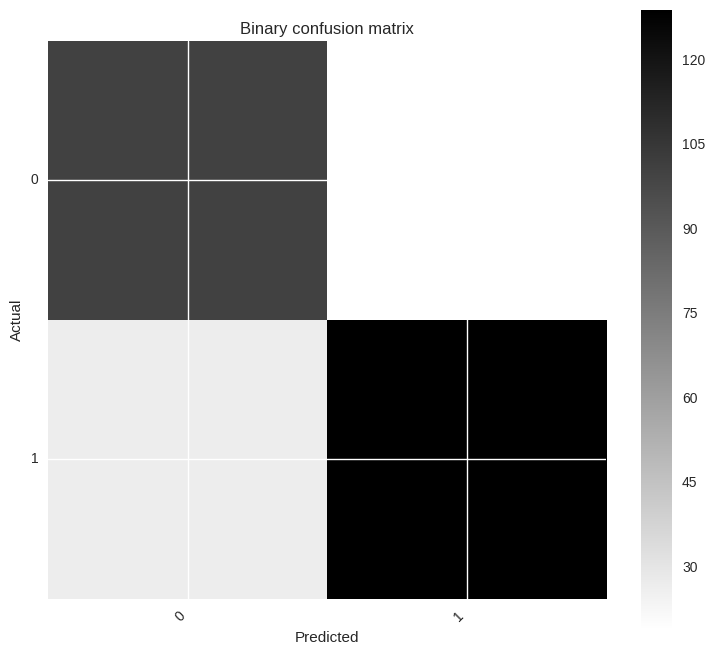

In [209]:
cm11.plot()

## Feature importances

Feature ranking:
1. feature 3 (0.168479 -> cp)
2. feature 11 (0.128864 -> thalach)
3. feature 2 (0.114998 -> cholestrol)
4. feature 0 (0.101391 -> Age)
5. feature 6 (0.092575 -> oldpeak)
6. feature 12 (0.084294 -> trestbps)
7. feature 4 (0.069679 -> exang)
8. feature 9 (0.066962 -> slope)
9. feature 8 (0.055549 -> sex)
10. feature 10 (0.047263 -> thal)
11. feature 7 (0.029991 -> restecg)
12. feature 1 (0.025704 -> ca)
13. feature 5 (0.014251 -> fbs)


(-1, 13)

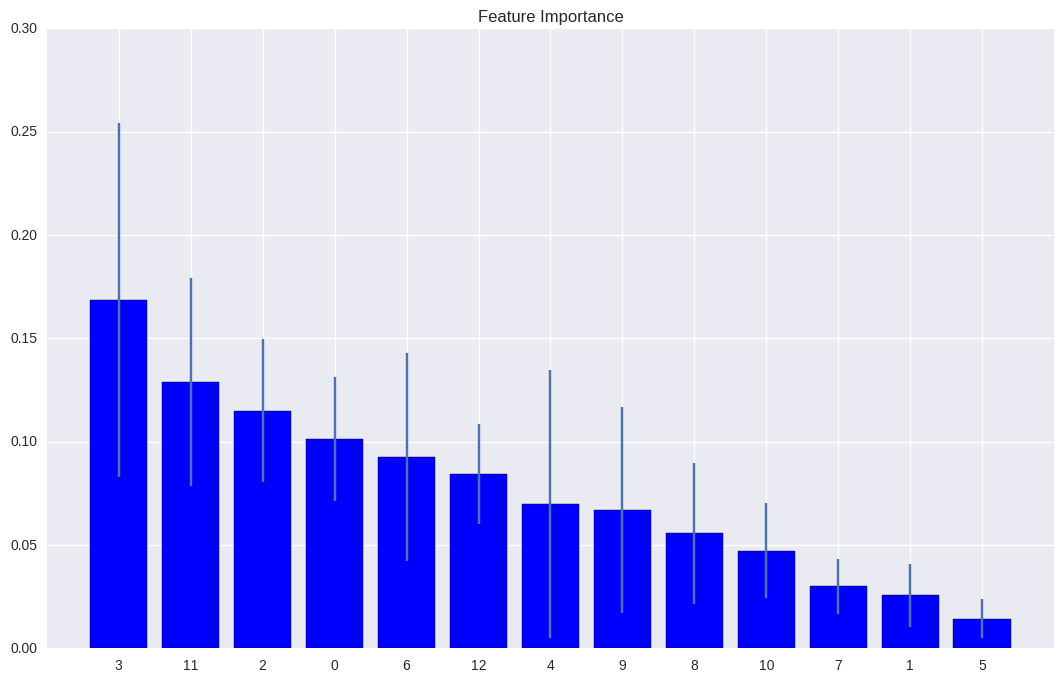

In [210]:


import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f ->" % (f + 1,indices[f], importances[indices[f]])+" "+ftcol[int(indices[f])]+")")
# Plot the feature importance of the forest
plt.figure(figsize=(13,8))
plt.title('Feature Importance')
plt.bar(range(features.shape[1]), importances[indices], color="blue", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
#plt.savefig('fig1.jpg')

In [211]:
import seaborn as sns

In [212]:
len(ftcol)

13

## Neural Network 

In [213]:
from keras.layers import Dropout

In [271]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu',kernel_initializer='normal'))
model.add(Dense(11, input_dim=13, activation='relu',kernel_initializer='normal'))

model.add(Dropout(0.2))
model.add(Dense(7, activation='linear',kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dropout(0.2))

model.add(Dense(2, input_dim=13, activation='relu',kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='normal'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [276]:
model.fit(features,label,epochs=500)

Epoch 1/500
644/644 [==============================] - 0s - loss: 0.4548 - acc: 0.8059     
Epoch 2/500
644/644 [==============================] - 0s - loss: 0.4267 - acc: 0.8152     
Epoch 3/500
644/644 [==============================] - 0s - loss: 0.4331 - acc: 0.8059     
Epoch 4/500
644/644 [==============================] - 0s - loss: 0.4081 - acc: 0.8261     
Epoch 5/500
644/644 [==============================] - 0s - loss: 0.4048 - acc: 0.8214     
Epoch 6/500
644/644 [==============================] - 0s - loss: 0.4301 - acc: 0.8199     
Epoch 7/500
644/644 [==============================] - 0s - loss: 0.4433 - acc: 0.8152     
Epoch 8/500
644/644 [==============================] - 0s - loss: 0.4387 - acc: 0.8043     
Epoch 9/500
644/644 [==============================] - 0s - loss: 0.4246 - acc: 0.8183     
Epoch 10/500
644/644 [==============================] - 0s - loss: 0.4505 - acc: 0.7950     
Epoch 11/500
644/644 [==============================] - 0s - loss: 0.4515 - acc

In [273]:
#from keras.models import load_model
#model.save('heart_model_new.h5')

In [282]:
model1 = load_model('heart_model_new_84.h5')
deeppred = model1.predict_classes(test[ftcol].values)
test['keras'] = deeppred

 32/276 [==>...........................] - ETA: 3s

/home/ricky/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [283]:
cmk = ConfusionMatrix(test['num'],test['keras'])

cmk

Predicted    0    1  __all__
Actual                      
0           99   21      120
1           22  134      156
__all__    121  155      276

In [284]:
cmk.print_stats()

population: 276
P: 156
N: 120
PositiveTest: 155
NegativeTest: 121
TP: 134
TN: 99
FP: 21
FN: 22
TPR: 0.858974358974
TNR: 0.825
PPV: 0.864516129032
NPV: 0.818181818182
FPR: 0.175
FDR: 0.135483870968
FNR: 0.141025641026
ACC: 0.844202898551
F1_score: 0.861736334405
MCC: 0.683335855066
informedness: 0.683974358974
markedness: 0.682697947214
prevalence: 0.565217391304
LRP: 4.90842490842
LRN: 0.17094017094
DOR: 28.7142857143
FOR: 0.181818181818


In [218]:
ftcol1  = train[ftcol].columns.difference(['fbs','ca','restecg'])
ftcol1

Index([u'Age', u'cholestrol', u'cp', u'exang', u'oldpeak', u'sex', u'slope',
       u'thal', u'thalach', u'trestbps'],
      dtype='object')

In [219]:
train[ftcol1] = train[ftcol1].astype('int')

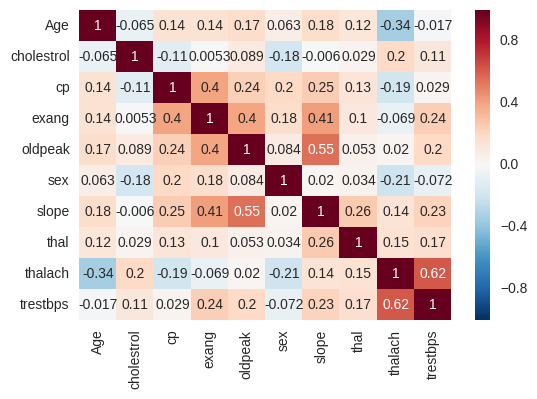

In [220]:
sns.heatmap(train[ftcol1].corr(),annot=True)